In [18]:
import numpy as np 
import matplotlib.pyplot as plt

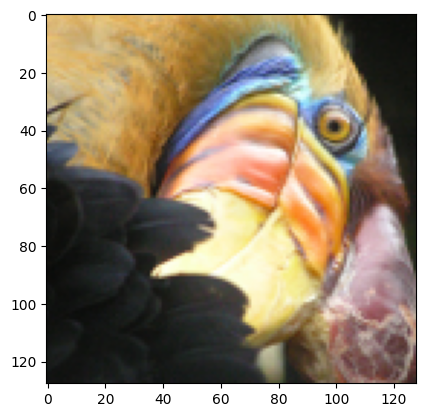

In [19]:
x = plt.imread("source.png")
plt.imshow(x)

In [20]:
print(x.shape)
print(f"{x[50,33,0]}\t{x[50,33,1]}\t{x[50,33,2]}")

(128, 128, 3)
0.686274528503418	0.48627451062202454	0.19607843458652496


Analysis


128 x 128 pixels and each pixel is represented by 24 bits i.e three 8 bit unsigned integers where each 8 bit represents a color intensity value i.e for pixel number 50x33 the RGB intensity values is stored at 
[50,33,0] [50,33,1] [50,33,2] = 0.686274528503418	0.48627451062202454	0.19607843458652496

Our image contains thousands of colors, and in this part of the exercise, you will reduce the number of
colors to 16 colors. * By making this reduction, it is possible to represent (compress) the photo in an efficient way. * Specifically, you only need to store the RGB values of the 16 selected colors, and for each pixel in the image you now need to only store the index of the color at that location (where only 4 bits are necessary to represent 16 possibilities)
Concretely, you will treat every pixel in the original image as a data example and use the K-means algorithm to find the 16 colors that best group (cluster) the pixels in the 3- dimensional RGB space.
Once you have computed the cluster centroids on the image, you will then use the 16 colors to replace the pixels in the original image.



In [21]:
x = x/255 #normalized to 0-1 range
img = np.reshape(x,(x.shape[0]*x.shape[1],3))       #reshaped img from 128x128x3 to 2D (16384,3) i.e 128*128,3
print(img.shape)

(16384, 3)


In [22]:
def init_centroids(dataset,num_features):
    randidx = np.random.permutation(dataset.shape[0])
    print(randidx)
    print(randidx.shape)
    centroids = dataset[randidx[:num_features]]
    print("Centroid vector shape : ",centroids.shape)
    return centroids

In [23]:
def closest_centroids(dataset,centroids):
    K = centroids.shape[0]
    index = np.zeros(dataset.shape[0])
    for i in range(dataset.shape[0]):
            distance = []
            for j in range(centroids.shape[0]):
                norm_ij = np.linalg.norm(dataset[i] - centroids[j])
                distance.append(norm_ij)
            index[i] = np.argmin(distance,axis=0)
    return index   #stores the coordinate vector of each examples' closest centroid
            

In [24]:
def compute_mean_centroids(dataset,centroids,index):
    K = centroids.shape[0]  #K = 16
    for i in range(K):
        points = dataset[index==i]
        centroids[i] = np.mean(points,axis = 0)
    return centroids

In [25]:
def kMeans(img,centroids,max_iters):
    m,n = img.shape
    for i in range(max_iters):
        print(f"K-Means {i+1}/{max_iters}...")
        idx = closest_centroids(img,centroids)
        new_centroids = compute_mean_centroids(img,centroids,idx)
    return new_centroids,idx

In [26]:
K = 16
max_iters = 10
random_centroids = init_centroids(img,K)
centroids , idx  = kMeans(img,random_centroids,max_iters)
print(centroids.shape)

[ 1546  4748  7006 ...  5192  1293 13560]
(16384,)
Centroid vector shape :  (16, 3)
K-Means 1/10...
K-Means 2/10...
K-Means 3/10...
K-Means 4/10...
K-Means 5/10...
K-Means 6/10...
K-Means 7/10...
K-Means 8/10...
K-Means 9/10...
K-Means 10/10...
(16, 3)


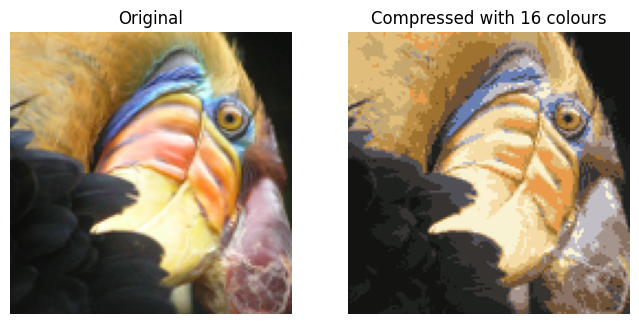

In [27]:
# Represent image in terms of indices
idx = idx.astype(int)
X_recovered = centroids[idx, :] 

# Reshape recovered image into proper dimensions
X_recovered = np.reshape(X_recovered,x.shape) 
# Display original image
fig, ax = plt.subplots(1,2, figsize=(8,8))
plt.axis('off')

ax[0].imshow(x*255)
ax[0].set_title('Original')
ax[0].set_axis_off()


# Display compressed image
ax[1].imshow(X_recovered*255)
ax[1].set_title('Compressed with %d colours'%K)
ax[1].set_axis_off()
plt.imsave('compressed_image.png', X_recovered*255)